In [3]:
## Importing necessary libraries and necessary settings 

from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from category_encoders import TargetEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, RocCurveDisplay
import pandas as pd 
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np 
from ydata_profiling import ProfileReport
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from category_encoders import TargetEncoder
import seaborn as sns 

In [4]:
#Importing the data 

df = pd.read_csv('loan_data.csv')
df.head()

Id   Income  Age  Experience Married/Single House_Ownership Car_Ownership  \
0   1  1303834   23           3         single          rented            no   
1   2  7574516   40          10         single          rented            no   
2   3  3991815   66           4        married          rented            no   
3   4  6256451   41           2         single          rented           yes   
4   5  5768871   47          11         single          rented            no   

            Profession                 CITY           STATE  CURRENT_JOB_YRS  \
0  Mechanical_engineer                 Rewa  Madhya_Pradesh                3   
1   Software_Developer             Parbhani     Maharashtra                9   
2     Technical_writer            Alappuzha          Kerala                4   
3   Software_Developer          Bhubaneswar          Odisha                2   
4        Civil_servant  Tiruchirappalli[10]      Tamil_Nadu                3   

   CURRENT_HOUSE_YRS  Risk_Flag  
0                 13          0  
1                 13          0  
2                 10          0  
3                 12          1  
4                 14          1

In [5]:
df = df.drop(columns=['Id'])


In [142]:
#Shape of the dataframe
col = df.shape[0]
num = df.shape[1]
print(f"Following dataset has {col} columns and {num} rows")


Following dataset has 252000 columns and 12 rows


In [143]:
df.describe().T

count          mean           std      min        25%  \
Income             252000.0  4.997117e+06  2.878311e+06  10310.0  2503015.0   
Age                252000.0  4.995407e+01  1.706385e+01     21.0       35.0   
Experience         252000.0  1.008444e+01  6.002590e+00      0.0        5.0   
CURRENT_JOB_YRS    252000.0  6.333877e+00  3.647053e+00      0.0        3.0   
CURRENT_HOUSE_YRS  252000.0  1.199779e+01  1.399037e+00     10.0       11.0   
Risk_Flag          252000.0  1.230000e-01  3.284379e-01      0.0        0.0   

                         50%        75%        max  
Income             5000694.5  7477502.0  9999938.0  
Age                     50.0       65.0       79.0  
Experience              10.0       15.0       20.0  
CURRENT_JOB_YRS          6.0        9.0       14.0  
CURRENT_HOUSE_YRS       12.0       13.0       14.0  
Risk_Flag                0.0        0.0        1.0

In [144]:
profile = ProfileReport(df)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [145]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Income             252000 non-null  int64 
 1   Age                252000 non-null  int64 
 2   Experience         252000 non-null  int64 
 3   Married/Single     252000 non-null  object
 4   House_Ownership    252000 non-null  object
 5   Car_Ownership      252000 non-null  object
 6   Profession         252000 non-null  object
 7   CITY               252000 non-null  object
 8   STATE              252000 non-null  object
 9   CURRENT_JOB_YRS    252000 non-null  int64 
 10  CURRENT_HOUSE_YRS  252000 non-null  int64 
 11  Risk_Flag          252000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 23.1+ MB
None


In [146]:
df.isnull().sum()

Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [7]:
# Rename the columns of the DataFrame to be more descriptive and user-friendly
df.columns = ['income', 'age', 'experience', 'marital_status', 'house_ownership',
              'car_ownership', 'profession', 'city', 'state', 'current_job_yrs',
              'current_house_yrs', 'risk_flag']

# Define a list of columns that contain numerical data
numerical = ["income", "age", "experience", "current_job_yrs", "current_house_yrs"]

# Define a list of columns that contain categorical data
categorical = ["marital_status", "house_ownership", "car_ownership", "profession", "city", "state"]


In [148]:
# Calculate the skewness for numerical columns in the DataFrame
# Skewness indicates the asymmetry of the distribution of values
skewness = df[numerical].skew()

# Print the skewness values for each numerical column
print(skewness)

income               0.005958
age                 -0.005316
experience          -0.012779
current_job_yrs      0.273146
current_house_yrs    0.006786
dtype: float64


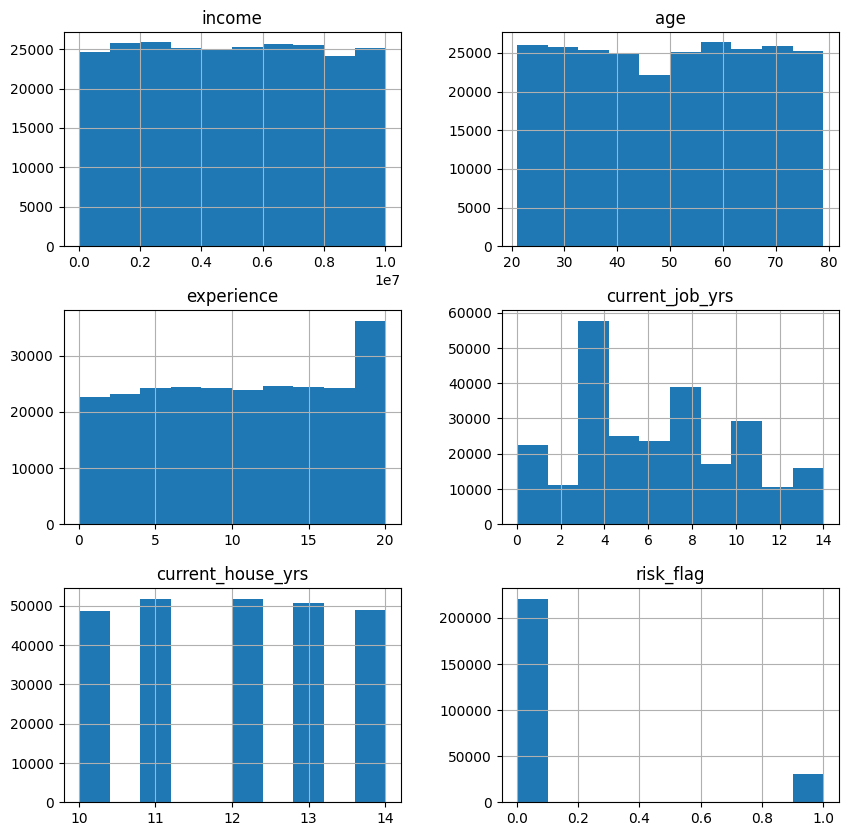

In [149]:
# Plot histograms for all numerical columns in the DataFrame
# figsize parameter specifies the size of the figure
df.hist(figsize=(10, 10))

# Display the plots
plt.show()

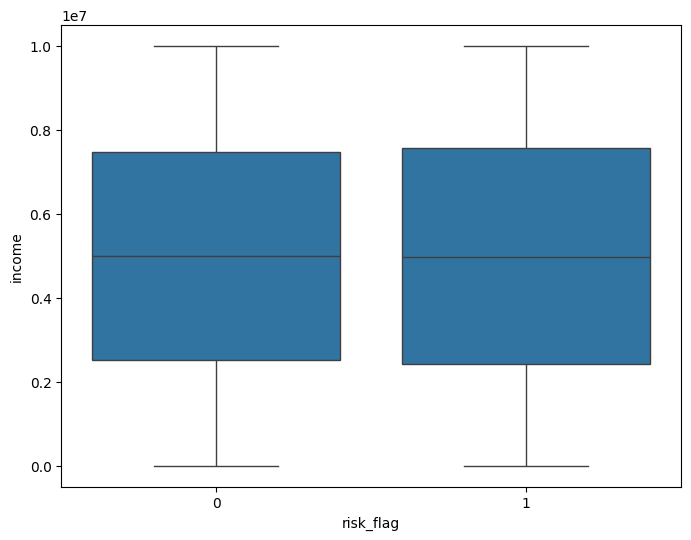

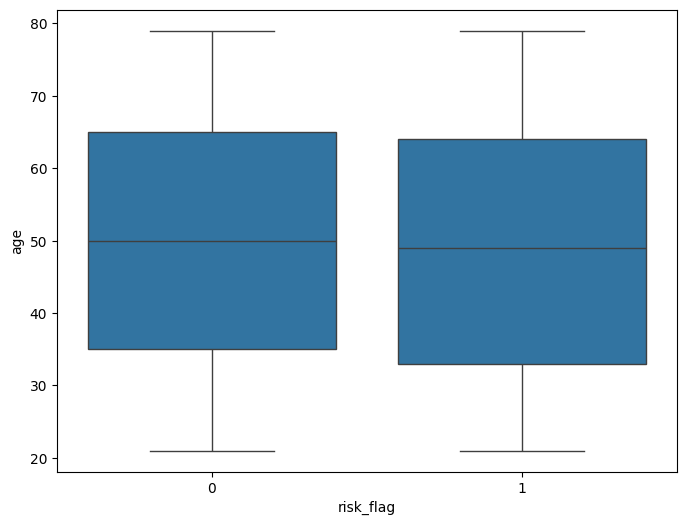

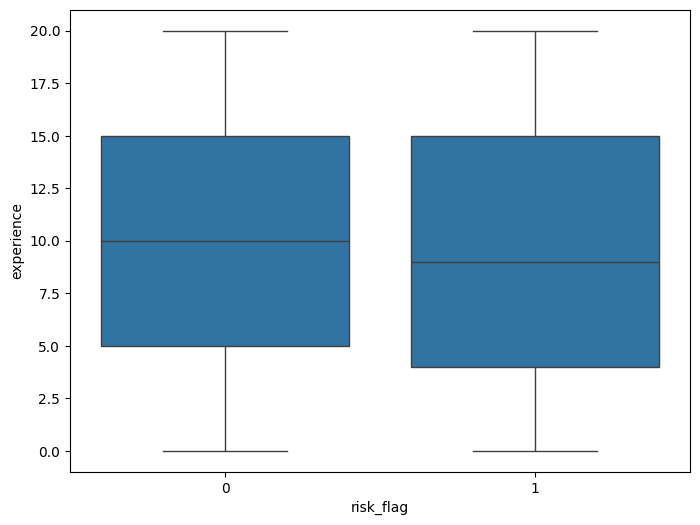

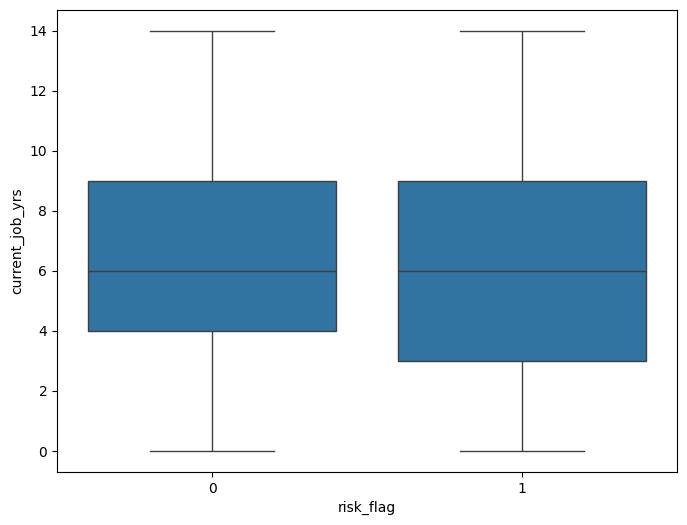

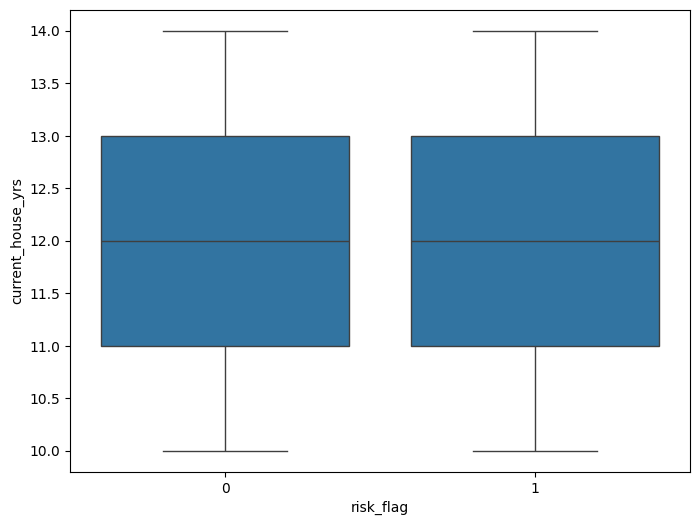

In [150]:
# Loop through each numerical column to create a boxplot
for numerical in ["income", "age", "experience", "current_job_yrs", "current_house_yrs"]:
    # Create a new figure and set of axes for each plot
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # Create a boxplot to visualize the distribution of numerical data
    # Split by the 'risk_flag' column to compare distributions
    sns.boxplot(x="risk_flag", y=numerical, data=df)
    
    # Display the plot
    plt.show()

There are no remarkable outliers that needs to be treated

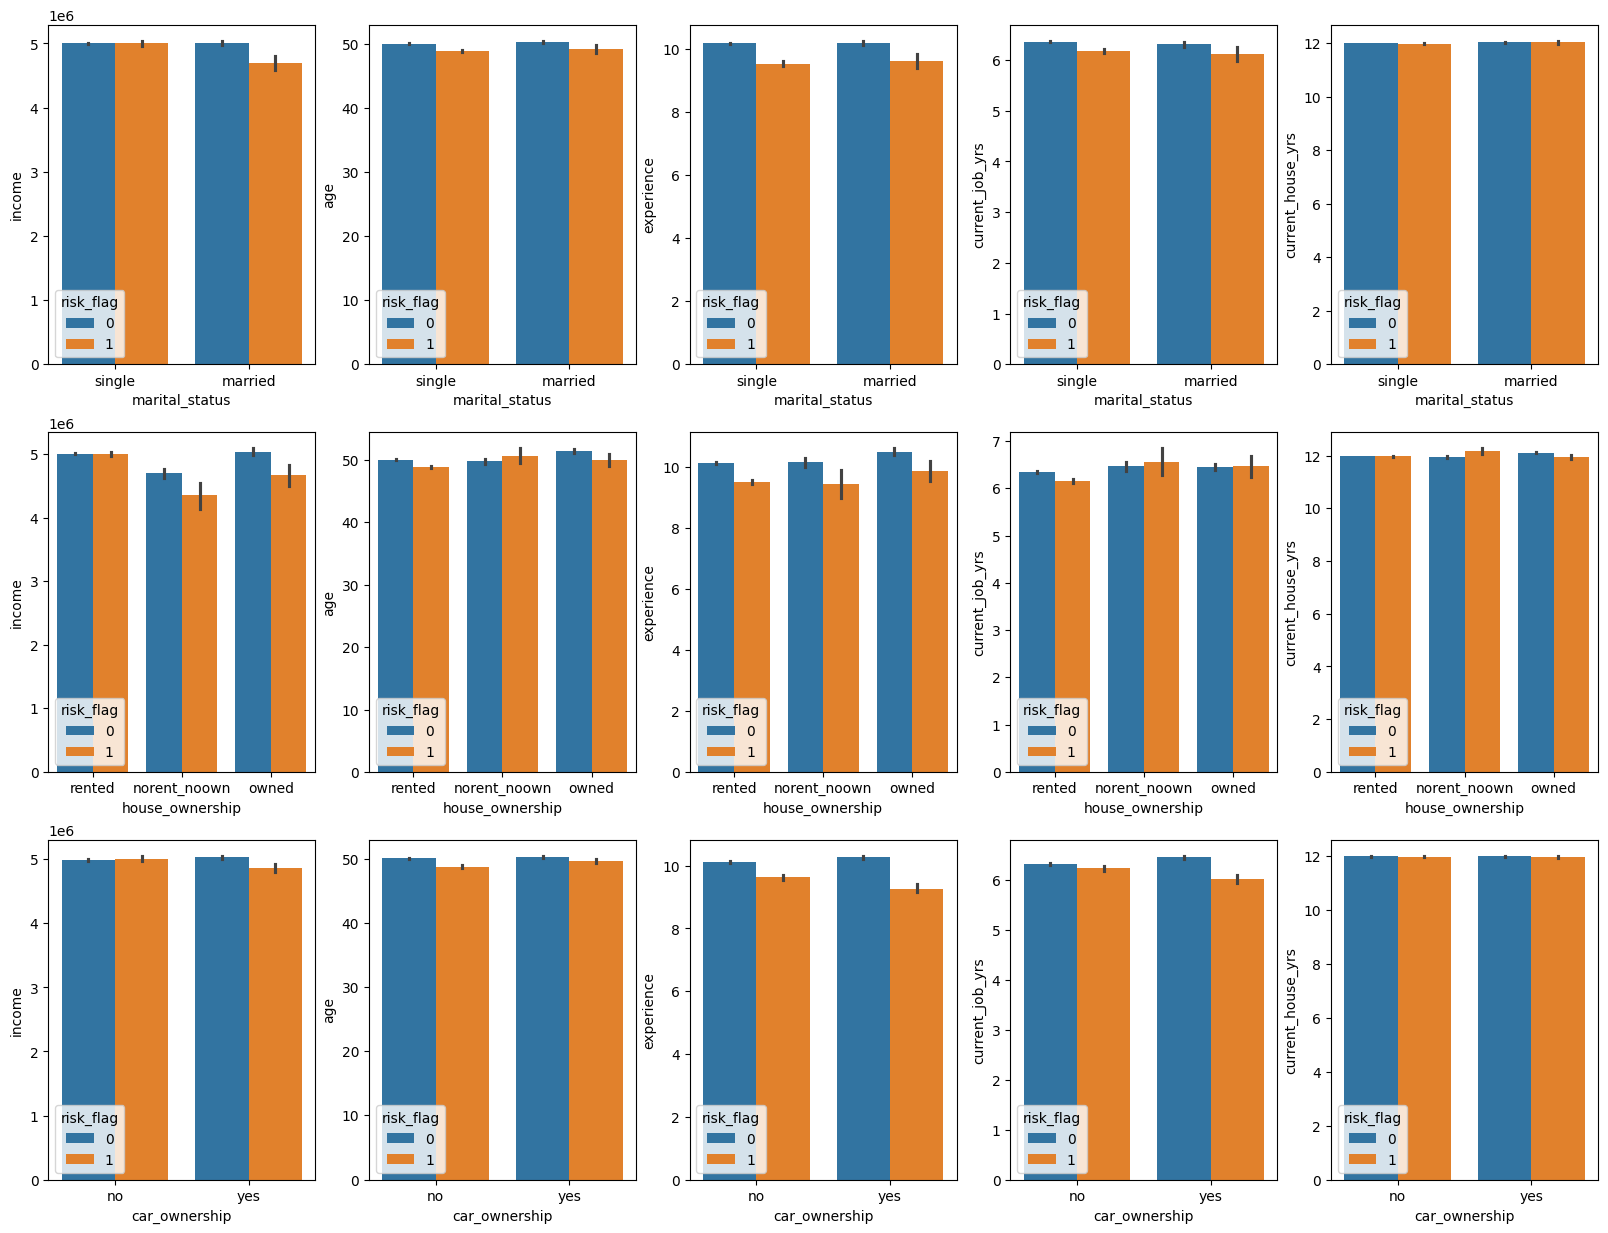

<Figure size 5000x5000 with 0 Axes>

In [151]:
# Define lists of numerical and categorical columns to be used in the plots
num = ["income", "age", "experience", "current_job_yrs", "current_house_yrs"]
cat = ["marital_status", "house_ownership", "car_ownership"]

# Create a figure with a grid of subplots, with 3 rows and 5 columns
# Set the overall figure size
fig, ax = plt.subplots(3, 5, figsize=(20, 15))

# Create another figure with a larger size for better visualization
plt.figure(figsize=(50, 50))

# Loop through each categorical and numerical combination to create bar plots
for c in range(len(cat)):
    for n in range(len(num)):
        # Get the current categorical and numerical features
        cat_feature = cat[c]
        num_feature = num[n]
        
        # Create a bar plot for the current categorical and numerical feature
        # Split by 'risk_flag' to compare distributions
        sns.barplot(x=cat_feature, y=num_feature, hue='risk_flag', data=df, ax=ax[c, n])

# Display the plots
plt.show()


We can see that variables have different scales all together,which interprets that scaling needs to be performed

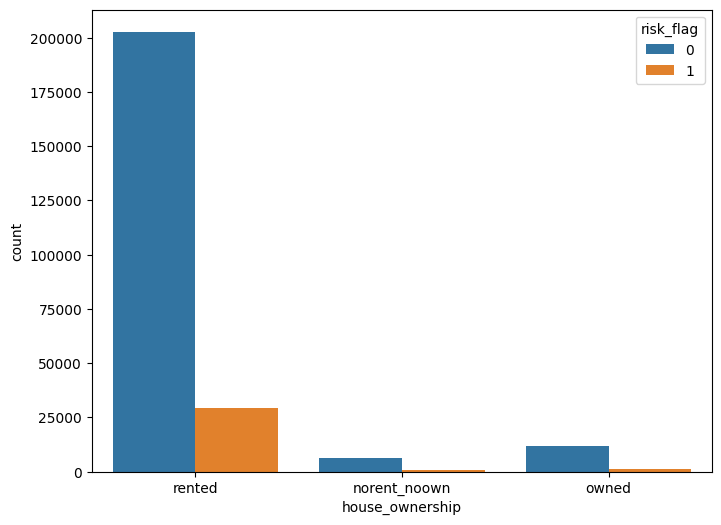

In [152]:
# Create a figure and a set of axes for the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Create a count plot to visualize the frequency of house ownership categories
# Split by 'risk_flag' to compare distributions within each category
sns.countplot(x='house_ownership', hue='risk_flag', data=df, ax=ax)

# Display the plot
plt.show()

We can see that rented house people are more in number which interprets that they are the one who avail loan facility

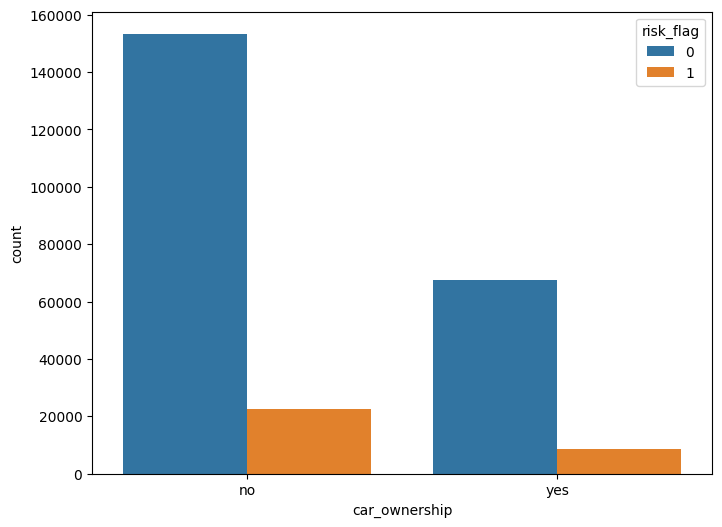

In [153]:
# Create a figure and a set of axes for the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Create a count plot to visualize the frequency of car ownership categories
# Split by 'risk_flag' to compare distributions within each category
sns.countplot(x='car_ownership', hue='risk_flag', data=df, ax=ax)

# Display the plot
plt.show()

People with no car are more likley to be taking more loan and defaulters are more than people with a car 

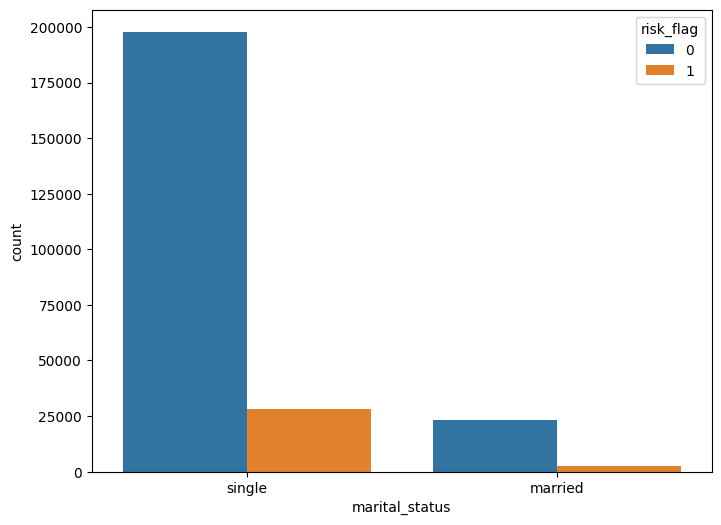

In [154]:
# Create a figure and a set of axes for the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Create a count plot to visualize the frequency of marital status categories
# Split by 'risk_flag' to compare distributions within each category
sns.countplot(x='marital_status', hue='risk_flag', data=df)

# Display the plot
plt.show()

We see that single people are more likley to avail loans and be potiential loan defaulters 

In [8]:
# Filter the DataFrame to include only rows where 'risk_flag' is 0 (indicating defaulters)
# Group the filtered DataFrame by 'city' and count the number of defaulters in each city
defaulters_count = df[df['risk_flag'] == 1].groupby('city').size().sort_values(ascending=False).head(10)

# Print the top 10 cities with the highest number of defaulters
print(defaulters_count)



city
Kochi          243
Satna          232
Buxar[37]      228
Srinagar       216
Indore         212
Barasat        206
Mango          200
Bhubaneswar    198
Ghaziabad      196
Sikar          191
dtype: int64


In [10]:
# Filter the DataFrame to include only rows where 'risk_flag' is 1 (indicating non-defaulters)
# Group the filtered DataFrame by 'city' and count the number of non-defaulters in each city
not_defaulters_count = df[df['risk_flag'] == 0].groupby('city').size().sort_values(ascending=False).head(10)

# Print the top 10 cities with the highest number of non-defaulters
print(not_defaulters_count)


city
Vijayanagaram    1110
Saharsa[29]      1067
Bulandshahr      1061
Bhopal           1042
Vijayawada       1025
New_Delhi        1024
Bellary           992
Bareilly          992
Satara            992
Jodhpur           974
dtype: int64


In [157]:
# Loop through each column in the list of categorical columns
for column in categorical:
    # Count the number of unique categories in the current column
    unique_categories = df[column].nunique()
    
    # Print the column name along with the count of unique categories
    print(column, ":" + str(unique_categories))


marital_status :2
house_ownership :3
car_ownership :2
profession :51
city :317
state :29


For the variables 'martial_status' and 'car_ownership' can be binary encoded,
while 'house_ownership' can be one hot encoded and other variables will be target encoded 


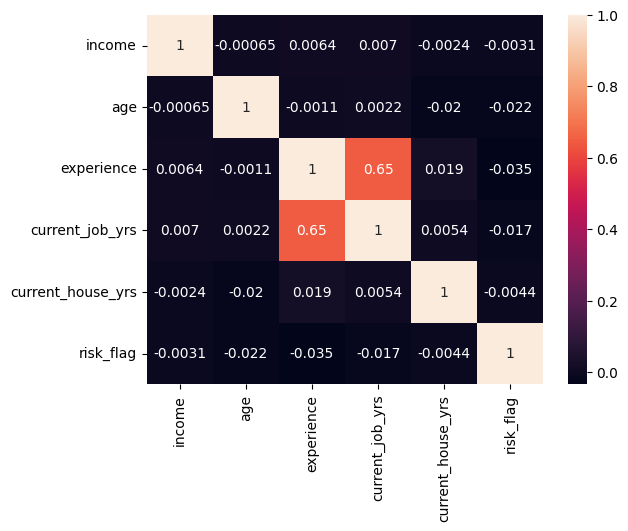

In [158]:
# Define a list of numerical columns, including 'risk_flag' for correlation analysis
numer = ["income", "age", "experience", "current_job_yrs", "current_house_yrs", 'risk_flag']

# Create a heatmap to visualize the correlation matrix of the numerical columns
# annot=True adds the correlation coefficients to each cell in the heatmap
sns.heatmap(df[numer].corr(), annot=True)

# Display the heatmap
plt.show()

In [159]:
# Separate the features (X) from the target variable (y)
# Drop the 'risk_flag' column from the DataFrame to create the feature set (X)
X = df.drop(['risk_flag'], axis=1)

# Assign the 'risk_flag' column to the target variable (y)
y = df['risk_flag']

# Split the dataset into training and testing sets
# Use 20% of the data for testing and 80% for training
# Set the random_state for reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [160]:
# Define dictionaries for mapping categorical values to numerical values
# 'marital_status' will be mapped to 1 for 'married' and 0 for 'single'
marital_status_dict = {'married': 1, 'single': 0}

# 'car_ownership' will be mapped to 1 for 'yes' and 0 for 'no'
car_ownership_dict = {'yes': 1, 'no': 0}

# Iterate through both the training and testing datasets
for dataset in [X_train, X_test]:
    # Map the 'marital_status' column values to numerical values using the defined dictionary
    dataset['marital_status'] = dataset['marital_status'].map(marital_status_dict)
    
    # Map the 'car_ownership' column values to numerical values using the defined dictionary
    dataset['car_ownership'] = dataset['car_ownership'].map(car_ownership_dict)


In [161]:
# Import the TargetEncoder from the category_encoders library for encoding categorical features
from category_encoders import TargetEncoder

# Define a list of columns that will be encoded using target encoding
cols_to_target_encode = ['profession', 'city', 'state']

# Iterate through each column that needs target encoding
for col in cols_to_target_encode:
    # Initialize the TargetEncoder
    encoder = TargetEncoder()
    
    # Fit the encoder on the training data and transform the training data
    # The encoder learns the encoding based on the target variable (y_train)
    X_train[col] = encoder.fit_transform(X_train[col], y_train)
    
    # Transform the test data using the fitted encoder
    # The encoder uses the same encoding learned from the training data
    X_test[col] = encoder.transform(X_test[col])


In [162]:


# Initialize the OneHotEncoder with sparse_output=False to return a dense array
# handle_unknown='ignore' ensures that unknown categories in the test set are ignored
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit the encoder on the 'house_ownership' column in the training set and transform it
# This converts the categorical 'house_ownership' into a one-hot encoded format
encoded_cols = encoder.fit_transform(X_train[['house_ownership']])

# Convert the encoded array to a DataFrame with appropriate column names
encoded_cols_df = pd.DataFrame(encoded_cols, 
                          columns = encoder.get_feature_names_out(['house_ownership']))

# Concatenate the one-hot encoded columns with the original training DataFrame
# Drop the original 'house_ownership' column after encoding
X_train = pd.concat([X_train, encoded_cols_df.set_index(X_train.index)], axis=1)
X_train.drop('house_ownership', axis=1, inplace=True)

# Transform the 'house_ownership' column in the test set using the fitted encoder
encoded_cols = encoder.transform(X_test[['house_ownership']])

# Convert the encoded array to a DataFrame with appropriate column names
encoded_cols_df = pd.DataFrame(encoded_cols, 
                          columns = encoder.get_feature_names_out(['house_ownership']))

# Concatenate the one-hot encoded columns with the original test DataFrame
# Drop the original 'house_ownership' column after encoding
X_test = pd.concat([X_test, encoded_cols_df.set_index(X_test.index)], axis=1)
X_test.drop('house_ownership', axis=1, inplace=True)


In [163]:
X_train.head()

income  age  experience  marital_status  car_ownership  profession  \
200471  9121364   70          18               0              0    0.120873   
92611   2636544   39           0               0              0    0.128980   
86397   1010539   39           9               0              0    0.131487   
110500  3897430   21           2               0              0    0.129292   
185133  9470213   41           5               0              1    0.107390   

            city     state  current_job_yrs  current_house_yrs  \
200471  0.236842  0.139313                3                 11   
92611   0.078621  0.103837                0                 11   
86397   0.155722  0.128364                4                 13   
110500  0.192362  0.133547                2                 12   
185133  0.114327  0.101142                5                 13   

        house_ownership_norent_noown  house_ownership_owned  \
200471                           0.0                    0.0   
92611                            0.0                    0.0   
86397                            0.0                    0.0   
110500                           0.0                    0.0   
185133                           1.0                    0.0   

        house_ownership_rented  
200471                     1.0  
92611                      1.0  
86397                      1.0  
110500                     1.0  
185133                     0.0

In [164]:


# Define a function to print evaluation metrics for model performance
def print_evaluation(y_test, y_pred):
    # Print the classification report, which includes precision, recall, and F1-score for each class
    print("Classification Report")
    print(classification_report(y_test, y_pred))
    
    # Print the confusion matrix, which shows the true vs. predicted classifications
    print("Confusion Matrix")
    print(confusion_matrix(y_test, y_pred))


In [165]:

# Initialize the Logistic Regression model with a maximum of 500,000 iterations for convergence
model = LogisticRegression(max_iter=500000)

# Fit the model on the training data
# This trains the logistic regression model using X_train and y_train
model.fit(X_train, y_train)

# Predict the target variable for the test set
# The model uses X_test to predict the values of y_test
y_pred = model.predict(X_test)

# Calculate the accuracy of the model on the test set
# This gives the proportion of correctly classified instances
accuracy = model.score(X_test, y_test)

# Print the accuracy as a percentage
# Multiplying by 100 converts the accuracy to a percentage
accuracy * 100


87.59325396825398

In [166]:

# Define a list of columns that need to be scaled
cols_to_scale = ['income', 'age', 'experience', 'current_job_yrs', 'current_house_yrs']

# Initialize the StandardScaler
# StandardScaler standardizes features by removing the mean and scaling to unit variance
scaler = StandardScaler()

# Fit the scaler on the training data and transform the specified columns
# This scales the features in X_train to have a mean of 0 and a standard deviation of 1
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])

# Transform the test data using the same scaler fitted on the training data
# This ensures the test data is scaled in the same way as the training data
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])


In [167]:

# Initialize the Logistic Regression model with a maximum of 500,000 iterations for convergence
model_scaled = LogisticRegression(max_iter=500000)

# Fit the model on the scaled training data
# This trains the logistic regression model using the scaled X_train and y_train
model_scaled.fit(X_train, y_train)

# Predict the target variable for the scaled test set
# The model uses the scaled X_test to predict the values of y_test
y_pred = model_scaled.predict(X_test)

# Calculate the accuracy of the model on the scaled test set
# This gives the proportion of correctly classified instances
accuracy = model_scaled.score(X_test, y_test)

# Print the accuracy as a percentage
# Multiplying by 100 converts the accuracy to a percentage
print(accuracy * 100)

# Print the classification report for the predictions
# This includes precision, recall, and F1-score for each class
print(classification_report(y_test, y_pred))


87.60912698412699
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     44147
           1       0.90      0.00      0.00      6253

    accuracy                           0.88     50400
   macro avg       0.89      0.50      0.47     50400
weighted avg       0.88      0.88      0.82     50400



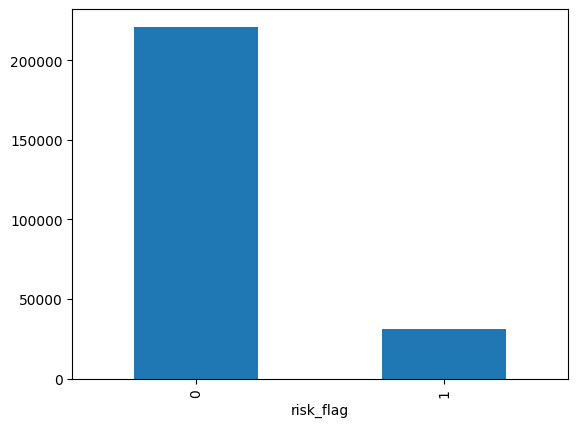

In [168]:
# Plot the count of each unique value in the 'risk_flag' column as a bar chart
# This shows the distribution of different classes in the 'risk_flag' column
df['risk_flag'].value_counts().plot(kind='bar')

# Display the plot
plt.show()


In [193]:
# Initialize the SMOTE (Synthetic Minority Over-sampling Technique) with a specific random seed
# SMOTE is used to balance the class distribution by generating synthetic samples for the minority class
sm = SMOTE(random_state=500)

# Apply SMOTE to the training data to generate synthetic samples and balance the classes
# fit_resample() returns the resampled feature set (X_sm) and the corresponding target variable (y_sm)
X_sm, y_sm = sm.fit_resample(X_train, y_train)
X_test_sm, y_test_sm = smote.fit_resample(X_test, y_test)

In [194]:
# Initialize the Logistic Regression model with a maximum of 500,000 iterations for convergence
model_scaled_os = LogisticRegression(max_iter=500000)

# Fit the model on the over-sampled training data
# This trains the logistic regression model using the resampled X_sm and y_sm
model_scaled_os.fit(X_sm, y_sm)

# Predict the target variable for the test set
# The model uses X_test to predict the values of y_test
y_pred = model_scaled_os.predict(X_test_sm)

# Calculate the accuracy of the model on the test set
# This gives the proportion of correctly classified instances
accuracy = model_scaled_os.score(X_test_sm, y_test_sm)

# Uncomment the line below to print the accuracy as a percentage
# print(accuracy * 100)

# Print the classification report for the predictions
# This includes precision, recall, and F1-score for each class
print(classification_report(y_test_sm, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.62      0.61     44147
           1       0.60      0.57      0.58     44147

    accuracy                           0.59     88294
   macro avg       0.60      0.59      0.59     88294
weighted avg       0.60      0.59      0.59     88294



In [195]:
# Initialize the K-Nearest Neighbors classifier with specific parameters
# n_neighbors=5 sets the number of neighbors to consider for classification
# metric='minkowski' specifies the distance metric to use (Minkowski distance)
# p=2 indicates the use of Euclidean distance (p=1 would be Manhattan distance)
model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)

# Fit the model on the over-sampled training data
# This trains the K-Nearest Neighbors classifier using the resampled X_sm and y_sm
model.fit(X_sm, y_sm)

# Predict the target variable for the test set
# The model uses X_test to predict the values of y_test
y_pred = model.predict(X_test_sm)

# Calculate the accuracy of the model on the test set
# This gives the proportion of correctly classified instances
accuracy = model.score(X_test_sm, y_test_sm)

# Print the accuracy as a percentage
print(accuracy * 100)

# Print the classification report for the predictions
# This includes precision, recall, and F1-score for each class
print(classification_report(y_test_sm, y_pred))

76.33134754343443
              precision    recall  f1-score   support

           0       0.71      0.90      0.79     44147
           1       0.86      0.63      0.73     44147

    accuracy                           0.76     88294
   macro avg       0.78      0.76      0.76     88294
weighted avg       0.78      0.76      0.76     88294



In [196]:
# Import the GradientBoostingClassifier from scikit-learn
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting Classifier with default parameters
# Gradient Boosting is an ensemble technique that builds models sequentially to correct errors of previous models
model = GradientBoostingClassifier()

# Fit the model on the over-sampled training data
# This trains the Gradient Boosting classifier using the resampled X_sm and y_sm
model.fit(X_sm, y_sm)

# Predict the target variable for the test set
# The model uses X_test to predict the values of y_test
y_pred = model.predict(X_test_sm)

# Calculate the accuracy of the model on the test set
# This gives the proportion of correctly classified instances
accuracy = model.score(X_test_sm, y_test_sm)

# Print the accuracy of the model (proportion of correct predictions)
print(accuracy)

# Print the classification report for the predictions
# This includes precision, recall, and F1-score for each class
print(classification_report(y_test_sm, y_pred))


0.6961514938727433
              precision    recall  f1-score   support

           0       0.72      0.63      0.68     44147
           1       0.67      0.76      0.71     44147

    accuracy                           0.70     88294
   macro avg       0.70      0.70      0.69     88294
weighted avg       0.70      0.70      0.69     88294



In [173]:
# Import the RandomForestClassifier from scikit-learn
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier with a fixed random seed for reproducibility
# Random Forest is an ensemble method that builds multiple decision trees and combines their results
model_1 = RandomForestClassifier(random_state=42)

# Fit the model on the training data
# This trains the Random Forest classifier using X_train and y_train
model_1.fit(X_train, y_train)

# Predict the target variable for the test set
# The model uses X_test to predict the values of y_test
y_pred = model_1.predict(X_test)

# Print the classification report for the predictions
# This includes precision, recall, and F1-score for each class
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.94      0.95      0.94     44147
           1       0.60      0.54      0.57      6253

    accuracy                           0.90     50400
   macro avg       0.77      0.74      0.75     50400
weighted avg       0.89      0.90      0.90     50400



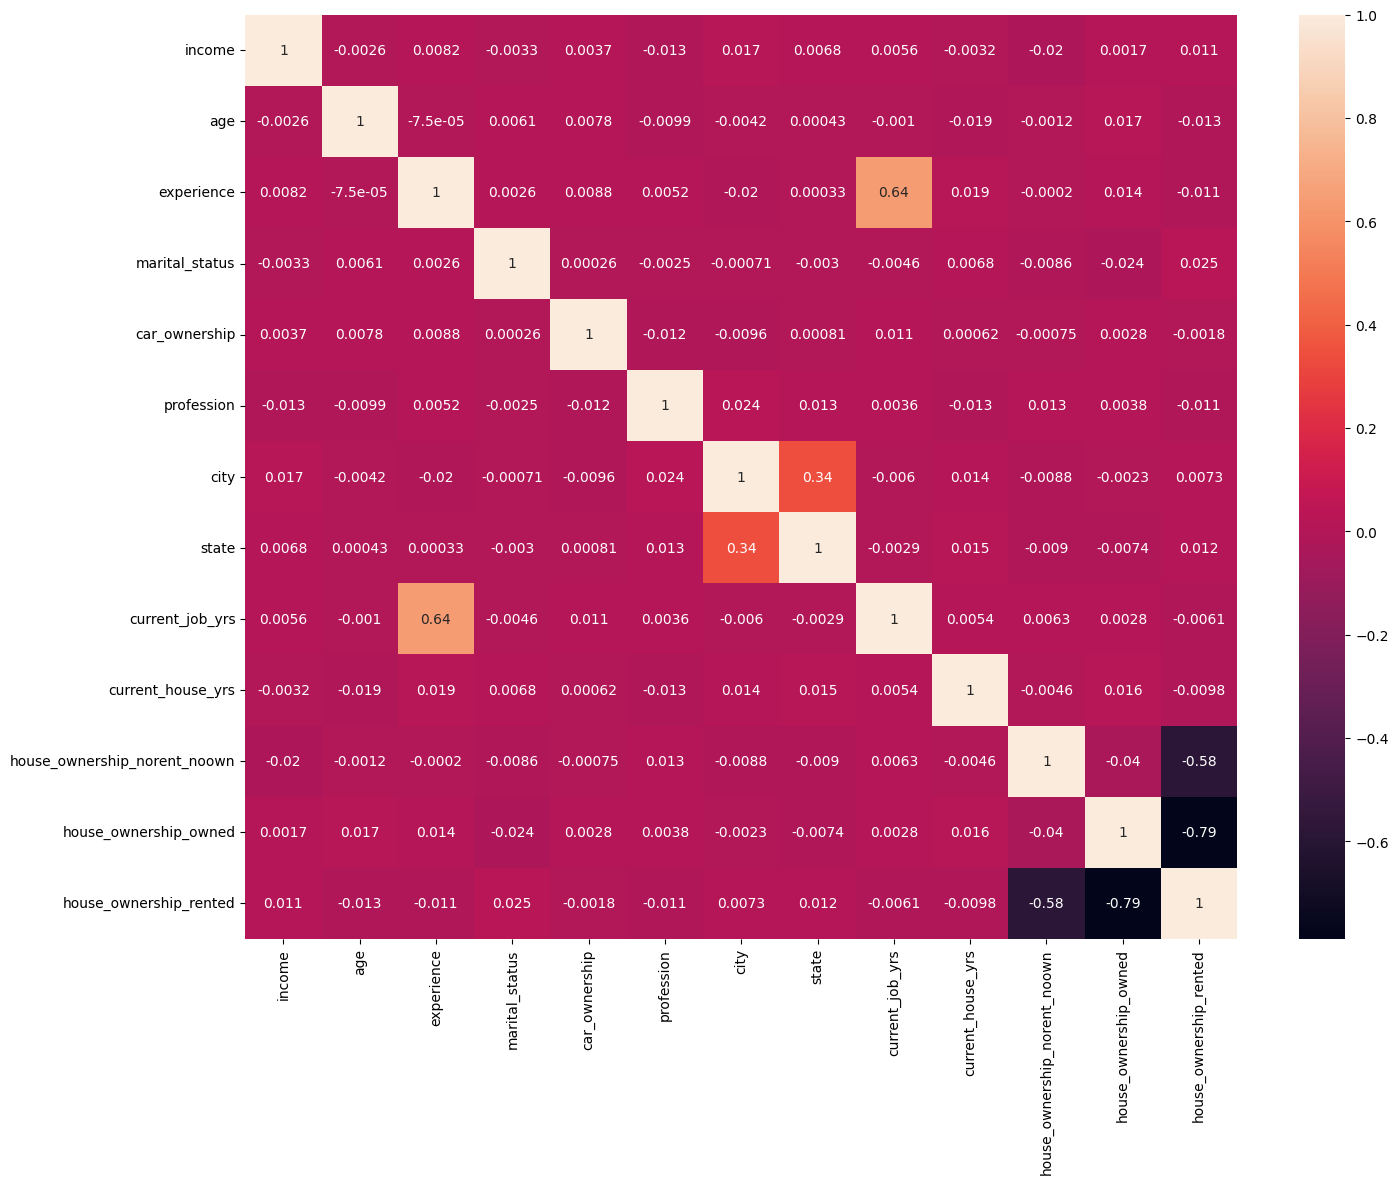

In [174]:
# Create a figure with a specified size for the heatmap
plt.figure(figsize=(16, 12))

# Create a heatmap to visualize the correlation matrix of the training data
# Use Spearman's rank correlation method to compute correlations
# annot=True adds the correlation coefficients to each cell in the heatmap
sns.heatmap(X_train.corr(method='spearman'), annot=True)

# Display the heatmap
plt.show()

In [175]:
# Define a list of columns to be dropped from the datasets
# These columns are considered less relevant for the model
cols_to_drop = ['current_job_yrs', 'city']

# Create a reduced version of the training set by dropping the specified columns
X_train_reduced = X_train.drop(cols_to_drop, axis=1)

# Create a reduced version of the test set by dropping the specified columns
X_test_reduced = X_test.drop(cols_to_drop, axis=1)

# Initialize the SMOTE (Synthetic Minority Over-sampling Technique) with a fixed random seed
# SMOTE is used to balance the class distribution by generating synthetic samples for the minority class
smote = SMOTE(random_state=42)

# Apply SMOTE to the reduced training data to generate synthetic samples and balance the classes
# This returns the over-sampled feature set (X_train_os) and the corresponding target variable (y_train_os)
X_train_os, y_train_os = smote.fit_resample(X_train_reduced, y_train)

# Apply SMOTE to the reduced test data to generate synthetic samples and balance the classes
# This returns the over-sampled feature set (X_test_os) and the corresponding target variable (y_test_os)
X_test_os, y_test_os = smote.fit_resample(X_test_reduced, y_test)


In [176]:
X_train_reduced.head()

income       age  experience  marital_status  car_ownership  \
200471  1.430422  1.170436    1.318759               0              0   
92611  -0.820701 -0.644922   -1.680840               0              0   
86397  -1.385148 -0.644922   -0.181041               0              0   
110500 -0.383000 -1.699001   -1.347551               0              0   
185133  1.551521 -0.527803   -0.847618               0              1   

        profession     state  current_house_yrs  house_ownership_norent_noown  \
200471    0.120873  0.139313          -0.712569                           0.0   
92611     0.128980  0.103837          -0.712569                           0.0   
86397     0.131487  0.128364           0.717243                           0.0   
110500    0.129292  0.133547           0.002337                           0.0   
185133    0.107390  0.101142           0.717243                           1.0   

        house_ownership_owned  house_ownership_rented  
200471                    0.0                     1.0  
92611                     0.0                     1.0  
86397                     0.0                     1.0  
110500                    0.0                     1.0  
185133                    0.0                     0.0

In [177]:


# Initialize the Random Forest Classifier with a fixed random seed for reproducibility
# Random Forest is an ensemble method that builds multiple decision trees and combines their results
model_2_rf = RandomForestClassifier(random_state=42)

# Fit the model on the over-sampled training data
# This trains the Random Forest classifier using the over-sampled X_train_os and y_train_os
model_2_rf.fit(X_train_os, y_train_os)

# Predict the target variable for the over-sampled test set
# The model uses the over-sampled X_test_os to predict the values of y_test_os
y_pred_os = model_2_rf.predict(X_test_os)

# Print the evaluation metrics for the model's performance on the over-sampled test set
# The evaluation includes a classification report and confusion matrix
print_evaluation(y_test_os, y_pred_os)



Classification Report
              precision    recall  f1-score   support

           0       0.93      0.91      0.92     44147
           1       0.91      0.93      0.92     44147

    accuracy                           0.92     88294
   macro avg       0.92      0.92      0.92     88294
weighted avg       0.92      0.92      0.92     88294

Confusion Matrix
[[39957  4190]
 [ 3013 41134]]


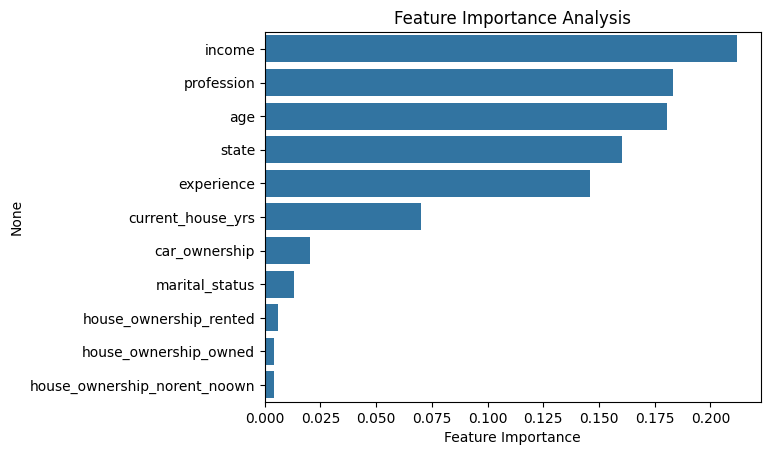

In [178]:
# Create a DataFrame to hold the feature importances
# The index is set to the feature names from the reduced training set
# The data consists of the feature importances obtained from the Random Forest model
# The DataFrame is sorted in descending order of feature importance
feature_imp = pd.DataFrame(index=X_train_reduced.columns, 
                           data=model_2_rf.feature_importances_, 
                           columns=["Feature Importance"]).sort_values("Feature Importance", ascending=False)

# Create a horizontal bar plot to visualize feature importances
# The x-axis represents feature importance values
# The y-axis represents feature names, sorted by importance
ax = sns.barplot(x=feature_imp["Feature Importance"], y=feature_imp.index)

# Set the title for the plot
plt.title("Feature Importance Analysis")

# Display the plot
plt.show()


In [179]:
# Define a list of columns to be dropped from the datasets
# These columns are considered less relevant or redundant for the model
cols_to_drop = ['car_ownership', 'marital_status', 
                 'house_ownership_rented', 'house_ownership_owned', 
                 'house_ownership_norent_noown']

# Create a reduced version of the training set by dropping the specified columns
X_train_reduced = X_train.drop(cols_to_drop, axis=1)

# Create a reduced version of the test set by dropping the specified columns
X_test_reduced = X_test.drop(cols_to_drop, axis=1)

# Initialize the SMOTE (Synthetic Minority Over-sampling Technique) with a fixed random seed
# SMOTE is used to balance the class distribution by generating synthetic samples for the minority class
smote = SMOTE(random_state=42)

# Apply SMOTE to the reduced training data to generate synthetic samples and balance the classes
# This returns the over-sampled feature set (X_train_os) and the corresponding target variable (y_train_os)
X_train_os, y_train_os = smote.fit_resample(X_train_reduced, y_train)

# Apply SMOTE to the reduced test data to generate synthetic samples and balance the classes
# This returns the over-sampled feature set (X_test_os) and the corresponding target variable (y_test_os)
X_test_os, y_test_os = smote.fit_resample(X_test_reduced, y_test)


In [180]:

# Initialize the Random Forest Classifier with a fixed random seed for reproducibility
# Random Forest is an ensemble method that builds multiple decision trees and combines their results
model_3_rf = RandomForestClassifier(random_state=100)

# Fit the model on the over-sampled training data
# This trains the Random Forest classifier using the over-sampled X_train_os and y_train_os
model_3_rf.fit(X_train_os, y_train_os)

# Predict the target variable for the over-sampled test set
# The model uses the over-sampled X_test_os to predict the values of y_test_os
y_pred_os = model_3_rf.predict(X_test_os)

# Print the classification report for the predictions
# This includes precision, recall, and F1-score for each class

print(classification_report(y_test_os, y_pred_os))


Classification Report
              precision    recall  f1-score   support

           0       0.93      0.90      0.92     44147
           1       0.90      0.94      0.92     44147

    accuracy                           0.92     88294
   macro avg       0.92      0.92      0.92     88294
weighted avg       0.92      0.92      0.92     88294

Confusion Matrix
[[39693  4454]
 [ 2791 41356]]
              precision    recall  f1-score   support

           0       0.93      0.90      0.92     44147
           1       0.90      0.94      0.92     44147

    accuracy                           0.92     88294
   macro avg       0.92      0.92      0.92     88294
weighted avg       0.92      0.92      0.92     88294



In [207]:
X_train_os.head()

income       age  experience  profession      city     state  \
0  1.430422  1.170436    1.318759    0.120873  0.236842  0.139313   
1 -0.820701 -0.644922   -1.680840    0.128980  0.078621  0.103837   
2 -1.385148 -0.644922   -0.181041    0.131487  0.155722  0.128364   
3 -0.383000 -1.699001   -1.347551    0.129292  0.192362  0.133547   
4  1.551521 -0.527803   -0.847618    0.107390  0.114327  0.101142   

   current_job_yrs  current_house_yrs  
0        -0.914084          -0.712569  
1        -1.736837          -0.712569  
2        -0.639833           0.717243  
3        -1.188335           0.002337  
4        -0.365582           0.717243

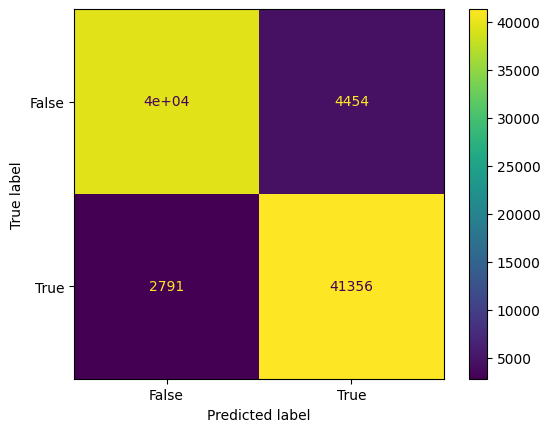

In [181]:
# Import the necessary module for metrics
from sklearn import metrics

# Define the actual and predicted labels for the test set
# 'actual' contains the true labels and 'predicted' contains the labels predicted by the model
actual = y_test_os
predicted = y_pred_os

# Compute the confusion matrix using the actual and predicted labels
# The confusion matrix shows the counts of true positives, true negatives, false positives, and false negatives
confusion_matrix = metrics.confusion_matrix(actual, predicted)

# Create a ConfusionMatrixDisplay object to visualize the confusion matrix
# 'display_labels' specifies the labels for the classes (False and True in this case)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[False, True])

# Plot the confusion matrix using the ConfusionMatrixDisplay object
cm_display.plot()

# Show the plot
plt.show()


In [182]:

# Initialize the StandardScaler
# StandardScaler standardizes features by removing the mean and scaling to unit variance
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
# This scales the features in X_train to have a mean of 0 and a standard deviation of 1
X_train_scale = scaler.fit_transform(X_train)

# Transform the test data using the same scaler fitted on the training data
# This ensures the test data is scaled in the same way as the training data
X_test_scale = scaler.transform(X_test)


# Import necessary metrics for evaluating the model
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Initialize the Random Forest Classifier with specified parameters
# criterion='gini' uses the Gini impurity for splitting nodes
# bootstrap=True enables bootstrapping of samples for each tree
# max_depth=10 limits the maximum depth of each tree
# max_features=None allows using all features for splitting
# min_samples_split=2 is the minimum number of samples required to split an internal node
# n_estimators=100 sets the number of trees in the forest
# random_state=100 ensures reproducibility
clf = RandomForestClassifier(criterion='gini', bootstrap=True, max_depth=10, 
                             max_features=None, min_samples_split=2, 
                             n_estimators=100, random_state=100)

# Fit the model on the scaled training data
# This trains the Random Forest classifier using the scaled X_train_scale and y_train
clf.fit(X_train_scale, y_train) 

# Predict the target variable for the scaled test set
# The model uses the scaled X_test_scale to predict the values of y_test
y_pred = clf.predict(X_test_scale)

# Print the classification report for the predictions
# This includes precision, recall, and F1-score for each class
print(classification_report(y_test, y_pred))




              precision    recall  f1-score   support

           0       0.88      1.00      0.94     44147
           1       0.71      0.08      0.14      6253

    accuracy                           0.88     50400
   macro avg       0.80      0.54      0.54     50400
weighted avg       0.86      0.88      0.84     50400



In [183]:
# Import the required classes for hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define a parameter grid for hyperparameter tuning
# The grid includes possible values for each hyperparameter of the Random Forest classifier
param_grid = {
   'bootstrap': [True],                   # Whether bootstrap samples are used when building trees
   'max_depth': [10, 20],                 # Maximum depth of the trees
   'max_features': [None],                # Number of features to consider for the best split
   'min_samples_split': [2, 10],          # Minimum number of samples required to split an internal node
   'n_estimators': [100]                  # Number of trees in the forest
}

# Initialize the Random Forest Classifier
rfc = RandomForestClassifier()

# Initialize the GridSearchCV object to perform exhaustive search over the parameter grid
# estimator specifies the model to use (RandomForestClassifier)
# param_grid specifies the grid of parameters to search
# n_jobs=-1 uses all available CPUs to speed up the process
# verbose=5 provides detailed logs of the process
clf = GridSearchCV(estimator=rfc, param_grid=param_grid, n_jobs=-1, verbose=5)

# Fit the GridSearchCV object on the training data
# This performs the cross-validated grid search to find the best hyperparameters
clf.fit(X_train_scale, y_train)

# Predict the target variable for the test set using the best estimator found by GridSearchCV
# The best estimator is the one with the best combination of hyperparameters
y_pred = clf.predict(X_test_scale)

# Print the accuracy of the model with the best parameters on the test set
print("Accuracy: ", accuracy_score(y_test, y_pred))

# Print the best parameters found by GridSearchCV
print(clf.best_params_)

# Print the best estimator (model) found by GridSearchCV
print(clf.best_estimator_)


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Accuracy:  0.8993253968253968
{'bootstrap': True, 'max_depth': 20, 'max_features': None, 'min_samples_split': 10, 'n_estimators': 100}
RandomForestClassifier(max_depth=20, max_features=None, min_samples_split=10)


In [190]:
# Import the necessary modules for evaluation metrics
from sklearn.metrics import accuracy_score, f1_score, classification_report, recall_score, precision_score
import sklearn.metrics as metrics

# Import the RandomForestClassifier from scikit-learn
from sklearn.ensemble import RandomForestClassifier


X_train_scaled_os, y_train_os = smote.fit_resample(X_train_scale, y_train)

# Apply SMOTE to the reduced test data to generate synthetic samples and balance the classes
# This returns the over-sampled feature set (X_test_os) and the corresponding target variable (y_test_os)
X_test_scaled_os, y_test_scaled_os = smote.fit_resample(X_test_scale, y_test)



# Initialize the Random Forest Classifier with specific parameters
# criterion='gini' specifies the use of the Gini impurity measure for splitting nodes
# bootstrap=True indicates that bootstrap samples are used to train each tree
# max_depth=20 limits the maximum depth of each tree
# max_features=None means that all features are considered for splitting
# min_samples_split=2 sets the minimum number of samples required to split an internal node
# n_estimators=100 specifies the number of trees in the forest
# random_state=100 ensures reproducibility of results
clf = RandomForestClassifier(criterion='gini', bootstrap=True, max_depth=20, max_features=None, min_samples_split=2, n_estimators=100, random_state=100)

# Fit the Random Forest model on the scaled training data
# This trains the model using the scaled X_train_scale and y_train
clf.fit(X_train_scaled_os, y_train_os)

# Predict the target variable for the scaled test set
# The model uses the scaled X_test_scale to predict the values of y_test
y_pred_scaled_os = clf.predict(X_test_scaled_os)

# Print the accuracy score of the model on the test set
# Accuracy score measures the proportion of correctly classified instances
print(f"Accuracy score: {accuracy_score(y_test_scaled_os, y_pred)}")

# Print the classification report for the predictions
# This includes precision, recall, and F1-score for each class
print(classification_report(y_test_scaled_os, y_pred))


Accuracy score: 0.902722721815752
              precision    recall  f1-score   support

           0       0.91      0.90      0.90     44147
           1       0.90      0.91      0.90     44147

    accuracy                           0.90     88294
   macro avg       0.90      0.90      0.90     88294
weighted avg       0.90      0.90      0.90     88294



In [223]:
# Adding y_pred to our data 
# Convert y_pred to a pandas Series 
y_pred_series = pd.Series(y_pred, name='Predicted_Risk_Flag')

# Combine X and y_pred into a new DataFrame
new_dataset = pd.concat([df.reset_index(drop=True), y_pred_series.reset_index(drop=True)], axis=1)

# Optionally, you can save this new dataset to a CSV file
#new_dataset.to_csv('new_dataset_with_predictions.csv', index=False)


new_dataset.head(20)

income  age  experience marital_status house_ownership car_ownership  \
0   1303834   23           3         single          rented            no   
1   7574516   40          10         single          rented            no   
2   3991815   66           4        married          rented            no   
3   6256451   41           2         single          rented           yes   
4   5768871   47          11         single          rented            no   
5   6915937   64           0         single          rented            no   
6   3954973   58          14        married          rented            no   
7   1706172   33           2         single          rented            no   
8   7566849   24          17         single          rented           yes   
9   8964846   23          12         single          rented            no   
10  4634680   78           7         single          rented            no   
11  6623263   22           4         single          rented            no   
12  9120988   28           9         single          rented            no   
13  8043880   57          12         single          rented            no   
14  9420838   48           6         single          rented            no   
15  5694236   39           2        married          rented           yes   
16  7315840   71           8        married          rented            no   
17  3666346   56          12         single          rented            no   
18  2241112   28           8         single          rented            no   
19  5431918   40           1         single          rented            no   

                profession                 city           state  \
0      Mechanical_engineer                 Rewa  Madhya_Pradesh   
1       Software_Developer             Parbhani     Maharashtra   
2         Technical_writer            Alappuzha          Kerala   
3       Software_Developer          Bhubaneswar          Odisha   
4            Civil_servant  Tiruchirappalli[10]      Tamil_Nadu   
5            Civil_servant              Jalgaon     Maharashtra   
6                Librarian             Tiruppur      Tamil_Nadu   
7                Economist             Jamnagar         Gujarat   
8         Flight_attendant              Kota[6]       Rajasthan   
9                Architect           Karimnagar       Telangana   
10        Flight_attendant          Hajipur[31]           Bihar   
11                Designer                Adoni  Andhra_Pradesh   
12               Physician            Erode[17]      Tamil_Nadu   
13       Financial_Analyst               Kollam          Kerala   
14        Technical_writer              Madurai      Tamil_Nadu   
15               Economist      Anantapuram[24]  Andhra_Pradesh   
16  Air_traffic_controller            Kamarhati     West_Bengal   
17              Politician             Bhusawal     Maharashtra   
18          Police_officer                Sirsa         Haryana   
19                  Artist            Amaravati  Andhra_Pradesh   

    current_job_yrs  current_house_yrs  risk_flag  Predicted_Risk_Flag  
0                 3                 13          0                  0.0  
1                 9                 13          0                  1.0  
2                 4                 10          0                  1.0  
3                 2                 12          1                  1.0  
4                 3                 14          1                  0.0  
5                 0                 12          0                  0.0  
6                 8                 12          0                  0.0  
7                 2                 14          0                  0.0  
8                11                 11          0                  0.0  
9                 5                 13          0                  1.0  
10                7                 12          0                  0.0  
11                4                 14          0                  1.0  
12                9           

In [202]:
import pickle

pickle.dump(clf,open('model.pkl','wb'))

In [203]:
model = pickle.load(open('model.pkl','rb'))

In [222]:
income = 1303834
age = 23 
experience = 3  
current_job_yrs = 3
current_house_yrs = 13
profession = 5217
city = 798
state = 14122



prediction = model_3_rf.predict([[income,age,experience,profession,city,state,current_job_yrs,current_house_yrs]])
prediction


c:\Users\raksh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)